# Regression

Regression models (both linear and non-linear) are used for predicting a real value, like salary for example. If the independent variable is time, then you are forecasting future values, otherwise your model is predicting present but unknown values. Regression technique vary from Linear Regression to SVR and Random Forests Regression.

Machine Learning Regression models:
<font color=#C71585>
<br>
<b>Models:</b>
- Linear Regression
    - Simple Linear Regression
    - Multiple Linear Regression
- Polynomial Regression
- Support Vector Regression (SVR)
- Decision Tree Regression
    - Random Forest Regression
<br>

<b>Regression Model Evaluation:</b>
- R-Squared
- Adjusted R-Squared
</font>

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("./Data/Salary_Data.csv")
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 24)

<h2>Linear Regression</h2>

In [ ]:
from sklearn.linear_model import LinearRegression

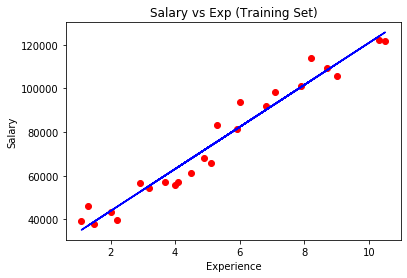

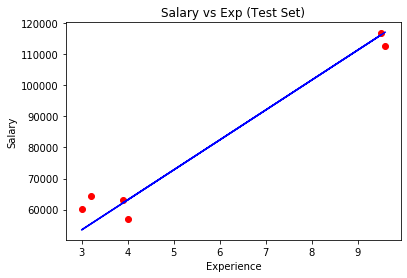

In [13]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_train_pred = linreg_model.predict(X_train)
y_pred = linreg_model.predict(X_test)

#Visualize Training data fit
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,y_train_pred,color = 'blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Exp (Training Set)')
plt.show()

#Visualize Test data fit
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
#Above line produces the same line as the Training set line. So above code gives same result as below one:
#plt.plot(X_train,y_train_pred,color = 'blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Exp (Test Set)')
plt.show()

In [22]:
linreg_model.coef_

array([9635.76791067])

In [24]:
round(linreg_model.intercept_,2)

24570.09

In [25]:
print(f"Regression Line Eq: salary = {round(linreg_model.intercept_,2)} + {round(linreg_model.coef_[0],2)}*Experience")

Regression Line Eq: salary = 24570.09 + 9635.77*Experience


# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("./Data/Position_Salaries.csv")
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


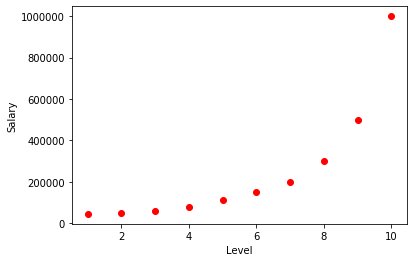

In [11]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
plt.scatter(X,y,color = 'red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [19]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)
y_pred

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

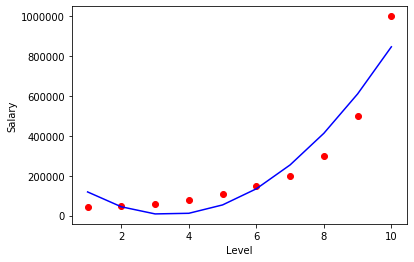

In [21]:
plt.scatter(X,y,color = 'red')
plt.plot(X,y_pred,color = 'blue')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Support Vector Regression (SVR)

<font color = red><b>NOTE: Feature Scaling is an important step before applying SVR</b></font>

In [5]:
from sklearn.svm import SVR

In [6]:
df = pd.read_csv("./Data/Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X = df.iloc[:,[1]].values
y = df.iloc[:,-1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


<font color = red>Since for this problem, we just want a reference model which can give us a approx salary for an input of level from 1 to 10,
hence we don't need train-test split here and train th model with entire dataset.</font>

<h3>Feature Scaling: StandardScaler fit_transform() and inverse_transform()</h3>

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Since StandardScaler uses mean and StdDev for the fitting column, hence we have to use different StandardScalers for X and y.
sc_X = StandardScaler()
sc_y = StandardScaler()

# Note: fit_transform expects a 2D Array. Here X is an 2D Array, but y is not.
# y = df.iloc[:,-1:].values could have made y a 2D array. But, we can do so with reshape also as below:
y = y.reshape(len(y),1)

X_Scaled = sc_X.fit_transform(X)
y_Scaled = sc_y.fit_transform(y)
print(X_Scaled)
print(y_Scaled)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


<font color=blue><b>SVR</b></font>: The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples. For large datasets consider using class:`sklearn.svm.LinearSVR` or class:`sklearn.linear_model.SGDRegressor` instead, possibly after a
class:`sklearn.kernel_approximation.Nystroem` transformer.

In [19]:
svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_Scaled, y_Scaled)

E:\_InstalledPrograms\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
#Predicting salary for level 6.5
#svr_model.predict([[6.5]]) is wrong, since the input has to be scaled as the trained data
print(svr_model.predict(sc_X.transform([[6.5]])))

#To get the y back in original scale, we have to apply inverse_transform to this output
sc_y.inverse_transform(svr_model.predict(sc_X.transform([[10]])))

[-0.27861589]


array([557821.75899897])

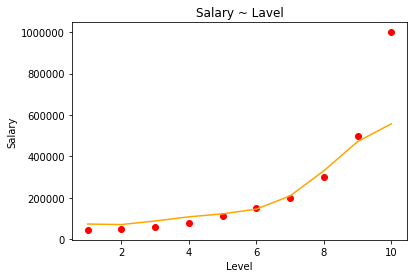

In [23]:
#Plotting the fit
y_pred = sc_y.inverse_transform(svr_model.predict(X_Scaled))
plt.scatter(X, y, color = 'red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Salary ~ Lavel')

plt.plot(X,y_pred,color='orange')
plt.show()
#Compare with Polynomial Regression plot, especially w.r.t. level 10 salary.

# Decision Tree

<h4><font color=blue>CART - Classification And Regression Trees</font></h4>

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
df = pd.read_csv("./Data/Position_Salaries.csv")
X = df.iloc[:,[1]].values
y = df.iloc[:,-1:].values

In [31]:
model = DecisionTreeRegressor(random_state = 24)
model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=24, splitter='best')

In [32]:
model.fit(X,y)
model.predict([[6.5]])

array([150000.])

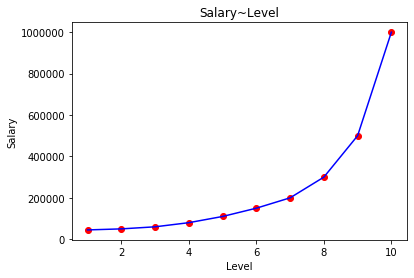

In [33]:
y_pred = model.predict(X)
plt.scatter(X,y, color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Salary~Level')

plt.plot(X,y_pred, color='blue')
plt.show()

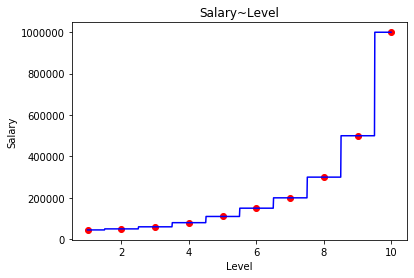

In [34]:
# High Resolution PLotting
X_highres = np.arange(min(X),max(X),0.01)
X_highres = X_highres.reshape(len(X_highres),1)
#X_highres
y_highres_pred = model.predict(X_highres)

# Plotting
plt.scatter(X,y, color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Salary~Level')

plt.plot(X_highres,y_highres_pred, color='blue')
plt.show()

<b><font color=red>NOTE: Decision Tree is suitable for large datasets with multiple features</font></b>

# Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_model.fit(X,y)

E:\_InstalledPrograms\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [38]:
rf_model.predict([[6.5]])

array([167000.])

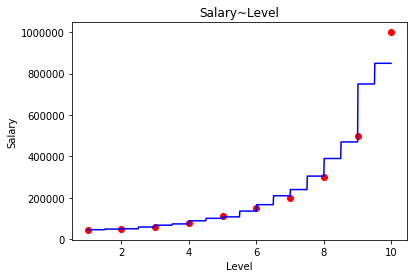

In [39]:
# PLotting the fit
X_grid = np.arange(min(X), max(X), 0.01) #Gives a 1D Array
#Convert to 2D Array
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X,y, color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Salary~Level')

plt.plot(X_grid,rf_model.predict(X_grid), color='blue')
plt.show()

# R-Squared (R<sup>2</sup>)

Error around regression line, SS<sub>res</sub> = SUM (y_real<sub>i</sub> - y_pred<sub>i</sub>)<sup>2</sup><br>
Error around Mean/Avg line,   SS<sub>tot</sub> = SUM (y_real<sub>i</sub> - y_mean<sub>i</sub>)<sup>2</sup><br><br>
<b><font color=blue>R<sup>2</sup> = 1 - (SS<sub>res</sub> / SS<sub>tot</sub>) <br></font></b>

Interpretation of R<sup>2</sup>:<br>
- Greater R<sup>2</sup> usually means a lower SS<sub>res</sub>. Hence it represents goodness of fit, greater is better.

Disadvantages of R<sup>2</sup>:<br>
- If you add a new feature to the model, often R<sup>2</sup> increases, since SS<sub>res</sub> decreases, even if the feature does not improve the model performance. It just finds a random correlation between the new feature and the target. To overcome this, Adj-R<sup>2</sup> is used.

# Adjusted R-Squared (Adjusted R<sup>2</sup>)

<b><font color=blue>Adj-R<sup>2</sup> = 1 - (1 - R<sup>2</sup>) [(n - 1)/(n - p - 1)]</b></font><br>

Where,<br> 
p - Number of Regressors<br>
n - Sample Size

Adj-R<sup>2</sup> penalizes for adding new feautures which don't help the model improve.

In [2]:
from sklearn.metrics import r2_score

In [4]:
from sklearn.model_selection import train_test_split

#for eg purpose, this data does not contain any Nan, missing or Categorical Feature
df = pd.read_csv("./Data/Data_Model_Sel.csv")
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 24)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
model = RandomForestRegressor(n_estimators = 50, random_state = 24)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(*args, **kw)>

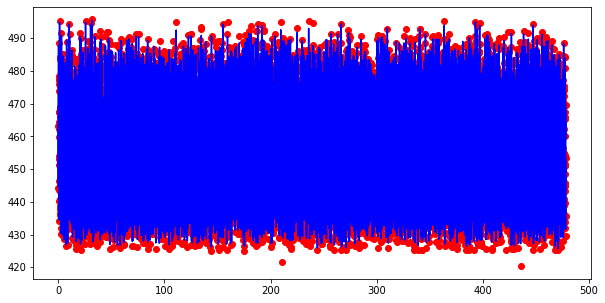

In [38]:
#Try to fix below plot
plt.figure(figsize=[10, 5])
plt.scatter(np.arange(0,len(X))/20,y, color='red')
plt.plot(np.arange(0,len(X))/20, model.predict(X), color='blue')
plt.show

In [45]:
r2_score(y_pred,y_test)

0.9656825937497215